In [118]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import ADASYN
import xgboost as xgb

In [195]:
df1=pd.read_csv('Dev_data_to_be_shared.csv',low_memory=False)

In [120]:
df1.head()

,Primary key,Target,account_opening_date,country_code,demog_1,demog_2,income,demog_3,city_tier,occupation,...,demog_39,email_domain,demog_40,demog_41,others_42,others_43,others_44,others_45,demog_42,demog_43
0,1,0,18-02-2023,IN,53.0,3,100001 to 5L,101.0,Rural,Self_Employed,...,1,gmail,low,1,NaN,0.0,NaN,NaN,1,medium
1,2,0,01-02-2023,IN,55.0,1,0 to 1L,101.0,Tier 1,Salaried,...,1,gmail,High,1,NaN,NaN,NaN,NaN,1,High
2,3,0,09-12-2022,IN,55.0,3,0 to 1L,101.0,Tier 2,Self_Employed,...,1,gmail,medium,1,NaN,NaN,NaN,NaN,1,High
3,4,0,31-03-2023,IN,53.0,3,100001 to 5L,101.0,Tier 7,Self_Employed,...,1,gmail,High,1,NaN,NaN,NaN,NaN,1,High
4,5,0,17-01-2023,IN,55.0,6,0 to 1L,101.0,Tier 1,Student,...,1,gmail,low,1,NaN,NaN,NaN,NaN,1,medium


In [121]:
df1.columns

Index(['Primary key', 'Target', 'account_opening_date', 'country_code',
       'demog_1', 'demog_2', 'income', 'demog_3', 'city_tier', 'occupation',
       ...
       'demog_39', 'email_domain', 'demog_40', 'demog_41', 'others_42',
       'others_43', 'others_44', 'others_45', 'demog_42', 'demog_43'],
      dtype='object', length=178)

In [122]:
df1.describe()

,Primary key,Target,demog_1,demog_3,demog_5,demog_6,demog_7,demog_8,demog_11,txn_1,...,others_41,txn_80,txn_81,demog_39,demog_41,others_42,others_43,others_44,others_45,demog_42
count,100000.000000,100000.000000,96331.000000,99994.000000,99975.000000,99999.000000,99994.0,96249.000000,99999.000000,74206.000000,...,99999.000000,42522.000000,48535.000000,100000.000000,100000.00000,2105.000000,4579.000000,874.000000,694.000000,100000.000000
mean,50000.500000,0.020000,79.543376,101.323279,3.290163,1.017180,1.0,41.191701,0.002250,0.128655,...,0.002220,34.742439,22.679159,0.999940,0.96329,87.887886,62.024896,28.808924,96.700288,0.958470
std,28867.657797,0.140001,89.498781,5.350011,0.833449,0.182553,0.0,0.641951,0.047381,1.933901,...,0.047065,251.845838,49.903348,0.007746,0.18805,298.951251,200.384998,136.963658,370.396893,0.199514
min,1.000000,0.000000,51.000000,101.000000,1.000000,1.000000,1.0,41.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25000.750000,0.000000,55.000000,101.000000,3.000000,1.000000,1.0,41.000000,0.000000,0.000000,...,0.000000,2.000000,6.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,50000.500000,0.000000,55.000000,101.000000,4.000000,1.000000,1.0,41.000000,0.000000,0.000000,...,0.000000,5.000000,12.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,75000.250000,0.000000,55.000000,101.000000,4.000000,1.000000,1.0,41.000000,0.000000,0.000000,...,0.000000,15.000000,27.000000,1.000000,1.00000,2.000000,4.000000,0.000000,0.000000,1.000000
max,100000.000000,1.000000,421.000000,213.000000,4.000000,4.000000,1.0,52.000000,1.000000,159.000000,...,1.000000,13907.000000,7810.000000,1.000000,1.00000,4049.000000,3283.000000,2922.000000,3603.000000,1.000000


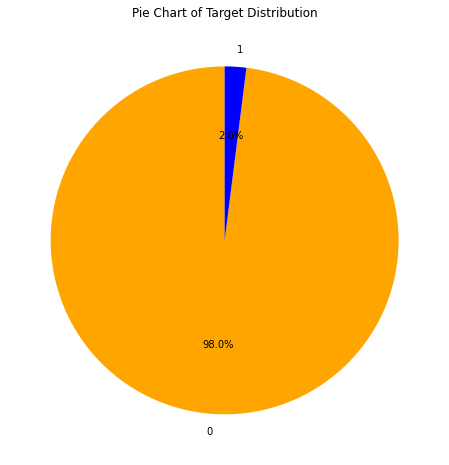

In [212]:
# Replace 'Target' with the name of your actual target column
target_column = 'Target'

# Calculate the distribution of binary values
binary_distribution = df1[target_column].value_counts()

# Set the size of the pie chart
plt.figure(figsize=(8, 8))
# Plotting a pie chart
plt.pie(binary_distribution, labels=binary_distribution.index, autopct='%1.1f%%', startangle=90, colors=['orange', 'blue'])
plt.title(f'Pie Chart of {target_column} Distribution')
plt.show()

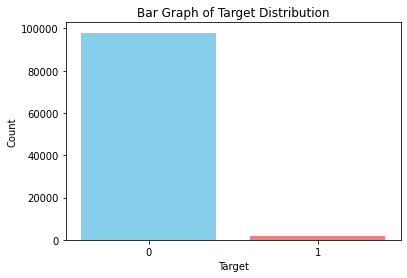

In [211]:
# Calculate the distribution of binary values
binary_distribution = df1[target_column].value_counts()

# Plotting a bar graph
plt.bar(binary_distribution.index, binary_distribution, color=['skyblue', 'lightcoral'])
plt.xlabel(target_column)
plt.ylabel('Count')
plt.title(f'Bar Graph of {target_column} Distribution')
plt.xticks(binary_distribution.index, labels=['0', '1'])  # Set x-axis labels
plt.show()

In [123]:
df1[df1['Target']==1]['country_code'].value_counts()
# all scammers are from india

IN    2000
Name: country_code, dtype: int64

In [124]:
df1[df1['Target']==1]['occupation'].value_counts()

Self_Employed    878
Salaried         438
Other            397
Student          202
Homemaker         72
Retired           11
Unemployed         1
Minor              1
Name: occupation, dtype: int64

In [125]:
df1[df1['Target']==1]['account_opening_date'].value_counts()

12-01-2023    36
02-02-2023    34
16-12-2022    32
03-02-2023    30
15-12-2022    29
              ..
25-12-2022     7
20-03-2023     7
05-03-2023     6
05-02-2023     6
19-03-2023     2
Name: account_opening_date, Length: 121, dtype: int64

In [126]:
# check_df=df1.dropna(axis=1)
# check_df.head()

In [127]:
# df1[df1['others_12']!=df1['others_13']].head()

In [128]:
df1[df1.Target==1].shape

(2000, 178)

In [129]:
df1[df1.Target==0].dropna().columns

Index(['Primary key', 'Target', 'account_opening_date', 'country_code',
       'demog_1', 'demog_2', 'income', 'demog_3', 'city_tier', 'occupation',
       ...
       'demog_39', 'email_domain', 'demog_40', 'demog_41', 'others_42',
       'others_43', 'others_44', 'others_45', 'demog_42', 'demog_43'],
      dtype='object', length=178)

In [130]:
txn=[x for x in df1.columns if x.startswith("txn")]
df1[txn].dropna(axis=0)
# df1[txn]

,txn_1,txn_2,txn_3,txn_4,txn_5,txn_6,txn_7,txn_8,txn_9,txn_10,...,txn_72,txn_73,txn_74,txn_75,txn_76,txn_77,txn_78,txn_79,txn_80,txn_81
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.0,8.0,11.0,29.0,2.0,2.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,20.0,144.0,...,0.0,21.0,150.0,6.0,20.0,2.0,4.0,4.0,12.0,28.0
2,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,96.0,240.0,...,0.0,97.0,244.0,7.0,15.0,0.0,2.0,2.0,5.0,48.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,1.0,3.0,1.0,2.0,16.0,17.0,17.0,1.0,10.0
5,0.0,0.0,0.0,0.0,1.0,3.0,3.0,6.0,41.0,87.0,...,0.0,43.0,93.0,20.0,31.0,2.0,0.0,0.0,6.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0.0,0.0,0.0,0.0,34.0,34.0,22.0,22.0,112.0,112.0,...,0.0,156.0,156.0,258.0,258.0,0.0,0.0,0.0,311.0,129.0
99995,0.0,0.0,0.0,0.0,1.0,1.0,6.0,6.0,6.0,6.0,...,0.0,7.0,7.0,18.0,18.0,1.0,1.0,1.0,15.0,4.0
99997,0.0,0.0,0.0,0.0,1.0,1.0,3.0,3.0,1.0,1.0,...,0.0,16.0,16.0,19.0,19.0,0.0,0.0,0.0,17.0,13.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,134.0,...,0.0,45.0,134.0,7.0,20.0,2.0,8.0,8.0,13.0,62.0


In [131]:
df_cat=df1.select_dtypes(include=['object'])
df_num=df1.select_dtypes(include=['number'])

In [132]:
df_num.columns

Index(['Primary key', 'Target', 'demog_1', 'demog_3', 'demog_5', 'demog_6',
       'demog_7', 'demog_8', 'demog_11', 'txn_1',
       ...
       'others_41', 'txn_80', 'txn_81', 'demog_39', 'demog_41', 'others_42',
       'others_43', 'others_44', 'others_45', 'demog_42'],
      dtype='object', length=154)

In [133]:
df_cat.columns

Index(['account_opening_date', 'country_code', 'demog_2', 'income',
       'city_tier', 'occupation', 'demog_4', 'demog_9', 'demog_10', 'demog_12',
       'demog_13', 'demog_14', 'demog_15', 'demog_16', 'demog_17', 'demog_18',
       'demog_19', 'demog_20', 'demog_21', 'demog_22', 'os', 'email_domain',
       'demog_40', 'demog_43'],
      dtype='object')

<AxesSubplot:>

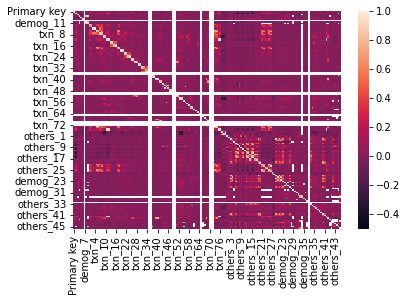

In [134]:
import seaborn as sns
sns.heatmap(df1.corr())

In [196]:
#Dropping the columns with nan values greater than 50 percent
new_df=df1.dropna(axis=1, thresh=0.5*len(df1))
new_df.shape

(100000, 171)

In [156]:
new_df["demog_2"].isnull().sum()

3668

<AxesSubplot:>

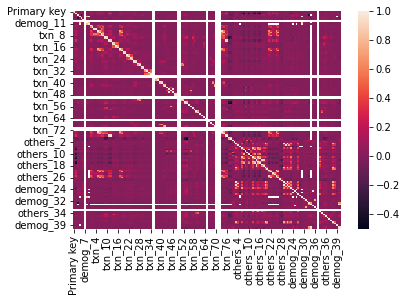

In [136]:
sns.heatmap(new_df.corr())

In [137]:
df_cat=new_df.select_dtypes(include=['object'])
df_num=new_df.select_dtypes(include=['number'])

In [138]:
df_num.describe()

,Primary key,Target,demog_1,demog_3,demog_5,demog_6,demog_7,demog_8,demog_11,txn_1,...,others_35,others_36,others_37,others_38,others_39,others_40,others_41,demog_39,demog_41,demog_42
count,100000.000000,100000.000000,96331.000000,99994.000000,99975.000000,99999.000000,99994.0,96249.000000,99999.000000,74206.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,99999.000000,99999.000000,100000.000000,100000.00000,100000.000000
mean,50000.500000,0.020000,79.543376,101.323279,3.290163,1.017180,1.0,41.191701,0.002250,0.128655,...,0.141050,0.472430,0.015270,0.000440,0.06374,0.004680,0.002220,0.999940,0.96329,0.958470
std,28867.657797,0.140001,89.498781,5.350011,0.833449,0.182553,0.0,0.641951,0.047381,1.933901,...,0.348075,0.499242,0.122625,0.020972,0.24429,0.068251,0.047065,0.007746,0.18805,0.199514
min,1.000000,0.000000,51.000000,101.000000,1.000000,1.000000,1.0,41.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,25000.750000,0.000000,55.000000,101.000000,3.000000,1.000000,1.0,41.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.00000,1.000000
50%,50000.500000,0.000000,55.000000,101.000000,4.000000,1.000000,1.0,41.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.00000,1.000000
75%,75000.250000,0.000000,55.000000,101.000000,4.000000,1.000000,1.0,41.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.00000,1.000000
max,100000.000000,1.000000,421.000000,213.000000,4.000000,4.000000,1.0,52.000000,1.000000,159.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000


In [139]:
df_cat.shape

(100000, 24)

In [140]:
txn=[x for x in df_num.columns if x.startswith("txn")]
txn_df=df_num[txn]  
# txn_df["txn_53"]

In [141]:
txn_df.describe()

,txn_1,txn_2,txn_3,txn_4,txn_5,txn_6,txn_7,txn_8,txn_9,txn_10,...,txn_69,txn_70,txn_71,txn_72,txn_73,txn_74,txn_75,txn_76,txn_77,txn_79
count,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,...,74206.000000,74206.0,74206.0,74206.0,74206.000000,74206.000000,74206.000000,74206.000000,54576.000000,55044.000000
mean,0.128655,0.312252,0.222866,0.488869,2.737191,5.911112,0.799423,1.999744,9.059604,29.053055,...,4.458777,0.0,0.0,0.0,14.364485,46.184567,15.002197,29.328572,22.272391,15.537824
std,1.933901,4.727764,13.893354,16.610152,63.665371,125.350885,10.018321,17.807918,24.315392,67.872758,...,8.128703,0.0,0.0,0.0,73.635365,164.725738,178.008928,206.119481,26.165808,22.827636
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,0.0,0.0,0.0,1.000000,10.000000,1.000000,5.000000,10.000000,4.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,...,6.000000,0.0,0.0,0.0,10.000000,44.000000,4.000000,16.000000,39.000000,20.000000
max,159.000000,776.000000,2810.000000,3175.000000,6145.000000,14430.000000,1202.000000,1833.000000,448.000000,1179.000000,...,664.000000,0.0,0.0,0.0,6386.000000,16734.000000,14562.000000,14562.000000,89.000000,89.000000


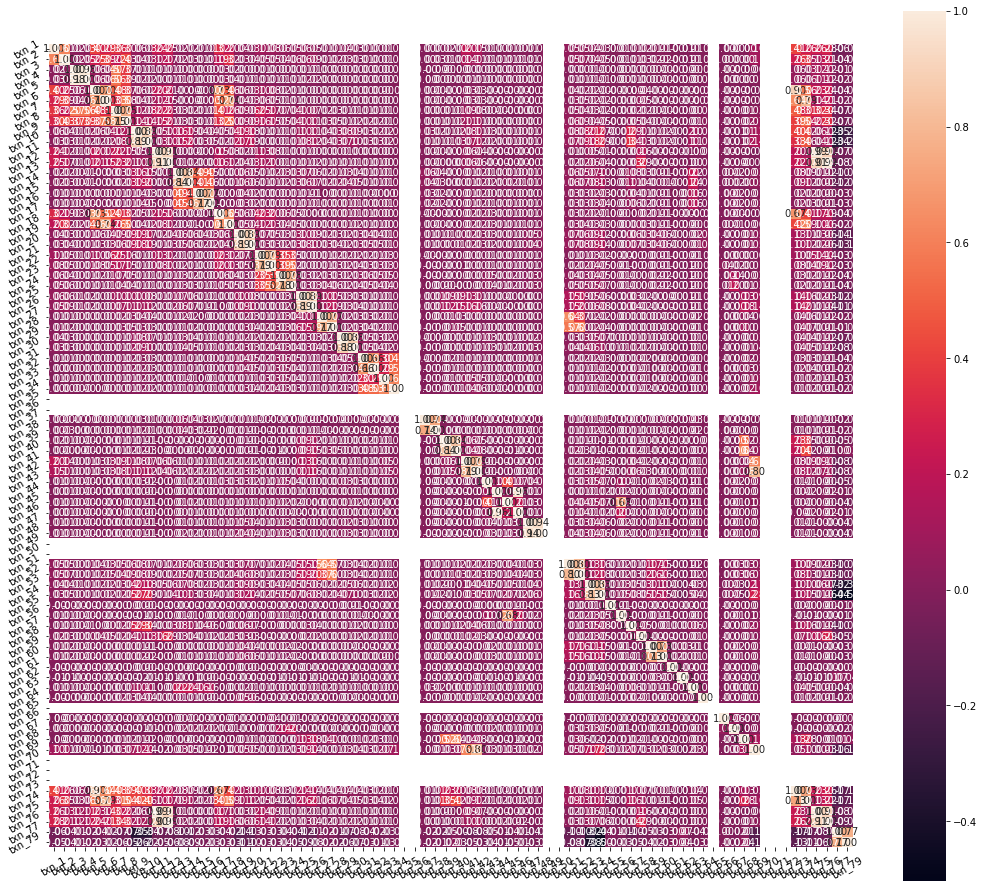

In [142]:
# sns.heatmap(txn_df.corr())
corr_matrix_txn = txn_df.corr()
plt.figure(figsize=(18,16))
a = sns.heatmap(corr_matrix_txn, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

In [143]:
demog=[x for x in new_df.columns if x.startswith("demog")]
demog_df=new_df[demog]

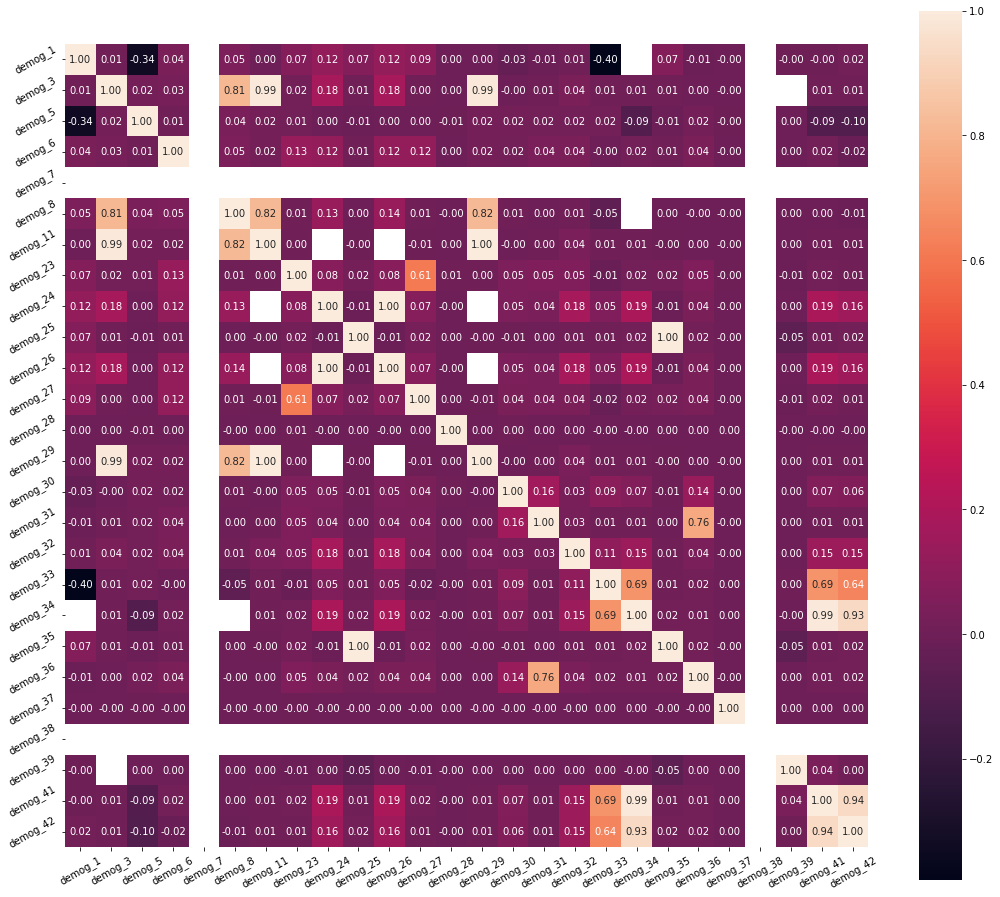

In [144]:
# sns.heatmap(demog_df.corr())
corr_matrix_demog = demog_df.corr()
plt.figure(figsize=(18,16))
a = sns.heatmap(corr_matrix_demog, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

In [145]:
others=[x for x in new_df.columns if x.startswith("others")]
others_df=new_df[others]

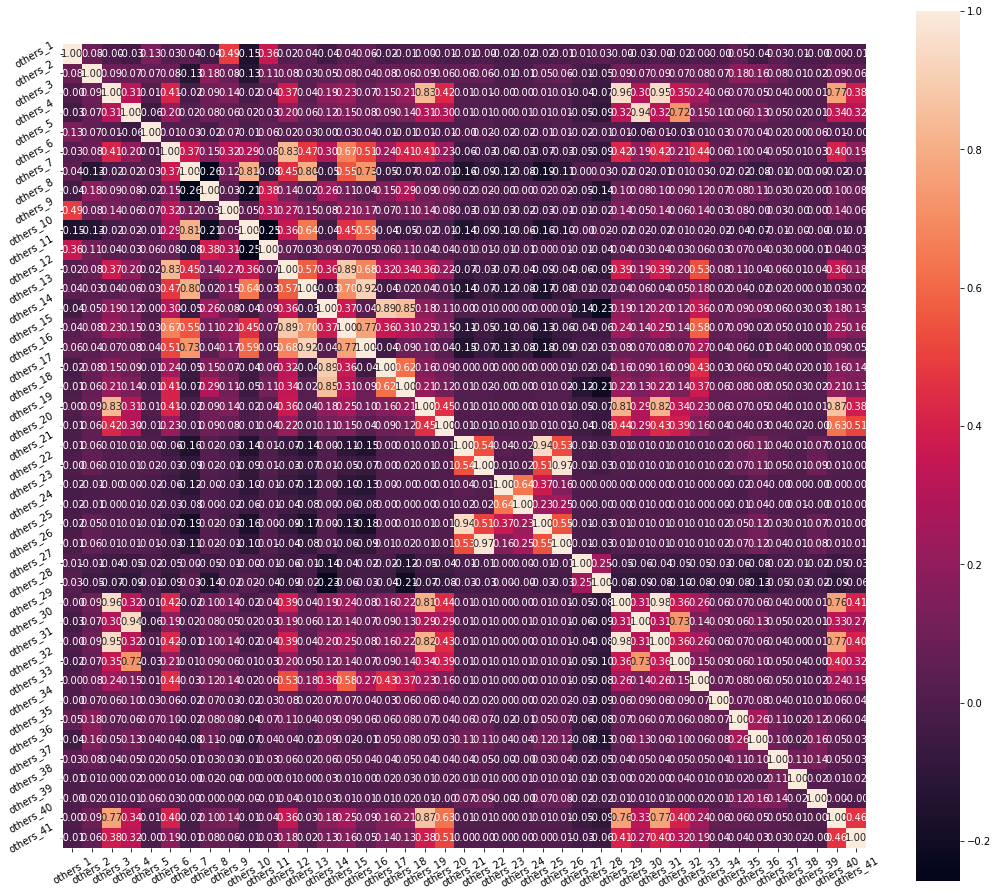

In [146]:
# sns.heatmap(others_df.corr())
corr_matrix_others = others_df.corr()
plt.figure(figsize=(18,16))
a = sns.heatmap(corr_matrix_others, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

In [199]:
def extract_categorical_columns(df, max_unique_values=100):
    categorical_columns = []

    for column in df.columns:
        if df[column].dtype == 'O':  # Check if the column has object (string) dtype
            unique_values = df[column].nunique()
            
            if unique_values <= max_unique_values:
                categorical_columns.append(column)

    return categorical_columns

categorical_columns = extract_categorical_columns(new_df)
print("Categorical Columns:", categorical_columns)

Categorical Columns: ['country_code', 'demog_2', 'income', 'city_tier', 'occupation', 'demog_4', 'demog_9', 'demog_10', 'demog_12', 'demog_13', 'demog_14', 'demog_15', 'demog_16', 'demog_17', 'demog_18', 'demog_19', 'demog_20', 'demog_21', 'demog_22', 'os', 'email_domain', 'demog_40', 'demog_43']


In [200]:
demog_cat = [x for x in categorical_columns if x.startswith("demog")]
type(demog_cat)

list

In [201]:
# columns_to_check = ["country_code", "income", "city_tier", "occupation", "os", "email_domain"]
for column in demog_cat:
    column_type = new_df[column].dtype
    print(f"{column}: {column_type}")

demog_2: object
demog_4: object
demog_9: object
demog_10: object
demog_12: object
demog_13: object
demog_14: object
demog_15: object
demog_16: object
demog_17: object
demog_18: object
demog_19: object
demog_20: object
demog_21: object
demog_22: object
demog_40: object
demog_43: object


In [202]:
new_df["demog_2"].value_counts()

1     42008
3     16695
2     13467
6     10394
7      5493
4      5424
5      1064
10     1058
11      482
17      225
15       10
9         7
ZZ        3
16        2
Name: demog_2, dtype: int64

In [203]:
from sklearn.preprocessing import LabelEncoder

def label_encode_binary_columns(df, binary_columns):
    label_encoder = LabelEncoder()
    for column in binary_columns:
        if df[column].dtype == 'O':  # Check if the column has object (string) dtype
            df[column] = label_encoder.fit_transform(df[column])
    return df
df_binary = new_df
binary_columns_to_encode = demog_cat
df_binary_encoded = label_encode_binary_columns(df_binary, binary_columns_to_encode)
print(df_binary_encoded)

def label_encode_ordinal_columns(df, ordinal_columns, ordinal_mapping):
    for column in ordinal_columns:
        if df[column].dtype == 'O':  # Check if the column has object (string) dtype
            df[column] = df[column].map(ordinal_mapping)
    return df

df_ordinal = new_df
ordinal_columns_to_encode = demog_cat
ordinal_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df_ordinal_encoded = label_encode_ordinal_columns(df_ordinal, ordinal_columns_to_encode, ordinal_mapping)
# print(df_ordinal_encoded)


C:\Users\anand\AppData\Local\Temp\ipykernel_3024\617232650.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])


       Primary key  Target account_opening_date country_code  demog_1  \
0                1       0           18-02-2023           IN     53.0   
1                2       0           01-02-2023           IN     55.0   
2                3       0           09-12-2022           IN     55.0   
3                4       0           31-03-2023           IN     53.0   
4                5       0           17-01-2023           IN     55.0   
...            ...     ...                  ...          ...      ...   
99995        99996       1           21-12-2022           IN     55.0   
99996        99997       1           17-03-2023           IN     55.0   
99997        99998       1           08-12-2022           IN     55.0   
99998        99999       1           03-03-2023           IN     55.0   
99999       100000       1           03-02-2023           IN    401.0   

       demog_2        income  demog_3 city_tier     occupation  ...  \
0            7  100001 to 5L    101.0     Rural  Sel

In [204]:
new_df["demog_2"].value_counts()

0     42008
7     16695
6     13467
10    10394
11     5493
8      5424
14     3668
9      1064
1      1058
2       482
5       225
3        10
12        7
13        3
4         2
Name: demog_2, dtype: int64

In [33]:
new_df.head()

,Primary key,Target,account_opening_date,country_code,demog_1,demog_2,income,demog_3,city_tier,occupation,...,others_38,others_39,others_40,others_41,demog_39,email_domain,demog_40,demog_41,demog_42,demog_43
0,1,0,18-02-2023,IN,53.0,7,100001 to 5L,101.0,Rural,Self_Employed,...,0,0,0.0,0.0,1,gmail,1,1,1,2
1,2,0,01-02-2023,IN,55.0,0,0 to 1L,101.0,Tier 1,Salaried,...,0,1,0.0,0.0,1,gmail,0,1,1,0
2,3,0,09-12-2022,IN,55.0,7,0 to 1L,101.0,Tier 2,Self_Employed,...,0,0,0.0,0.0,1,gmail,2,1,1,0
3,4,0,31-03-2023,IN,53.0,7,100001 to 5L,101.0,Tier 7,Self_Employed,...,0,0,0.0,0.0,1,gmail,0,1,1,0
4,5,0,17-01-2023,IN,55.0,10,0 to 1L,101.0,Tier 1,Student,...,0,0,0.0,0.0,1,gmail,1,1,1,2


In [34]:
demog_num = [x for x in df_num if x.startswith("demog")]
new_df=new_df.drop(demog_num,axis=1)

In [35]:
new_df.head()

,Primary key,Target,account_opening_date,country_code,demog_2,income,city_tier,occupation,demog_4,demog_9,...,others_35,others_36,others_37,others_38,others_39,others_40,others_41,email_domain,demog_40,demog_43
0,1,0,18-02-2023,IN,7,100001 to 5L,Rural,Self_Employed,6,0,...,0,0,0,0,0,0.0,0.0,gmail,1,2
1,2,0,01-02-2023,IN,0,0 to 1L,Tier 1,Salaried,6,1,...,0,1,0,0,1,0.0,0.0,gmail,0,0
2,3,0,09-12-2022,IN,7,0 to 1L,Tier 2,Self_Employed,6,0,...,1,1,0,0,0,0.0,0.0,gmail,2,0
3,4,0,31-03-2023,IN,7,100001 to 5L,Tier 7,Self_Employed,6,2,...,0,0,0,0,0,0.0,0.0,gmail,0,0
4,5,0,17-01-2023,IN,10,0 to 1L,Tier 1,Student,6,0,...,0,0,0,0,0,0.0,0.0,gmail,1,2


In [36]:
new_df['country_code'].value_counts()

IN    95847
US      132
GB       57
AE       48
CA       36
AU       34
SG       26
SA       19
DE       17
JP       10
NZ        8
KW        8
IE        7
QA        7
HK        7
MY        6
FR        5
NL        4
OM        4
PL        4
CH        4
PH        3
BE        3
LK        3
FI        2
SE        2
ID        2
FJ        2
GH        2
ZA        2
ZM        2
BH        2
NG        2
ES        2
PT        1
CN        1
MX        1
CZ        1
CL        1
MU        1
KR        1
SI        1
LU        1
KY        1
DK        1
JO        1
MG        1
TH        1
RU        1
Name: country_code, dtype: int64

In [37]:
new_df.shape

(100000, 145)

<AxesSubplot:>

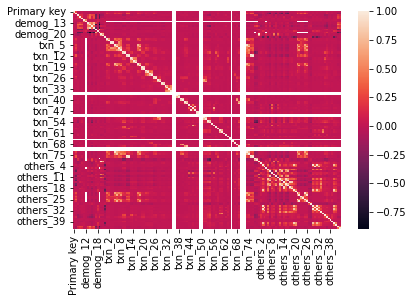

In [38]:
sns.heatmap(new_df.corr())

In [39]:
corr=new_df.corr()
txns=[x for x in new_df.columns if x.startswith('txn')]
txn_cors=corr['Target'][txns]
txn_cors=pd.DataFrame(txn_cors)
txn_cors.describe()


,Target
count,70.000000
mean,0.045110
std,0.095992
min,-0.120109
25%,-0.007736
50%,0.005693
75%,0.060019
max,0.330791


In [40]:
demogs=[x for x in new_df.columns if x.startswith('demog') and x in corr.columns]  
# len(demogs)
demog_cors=corr['Target'][demogs]
demog_cors=pd.DataFrame(demog_cors)
demog_cors.describe()

,Target
count,17.000000
mean,-0.023679
std,0.051627
min,-0.139347
25%,-0.049540
50%,-0.011596
75%,0.008718
max,0.061972


In [41]:
others=[x for x in new_df.columns if x.startswith('others') and x in corr.columns]
others_cors=corr['Target'][others]
others_cors=pd.DataFrame(others_cors)
others_cors.describe()

,Target
count,41.000000
mean,-0.030124
std,0.167399
min,-0.418453
25%,-0.040671
50%,-0.008749
75%,0.018865
max,0.344767


In [42]:
demogcat = [x for x in new_df.columns if x.startswith("demog")]
new_df = new_df.drop(demogcat,axis=1)

In [43]:
new_df.head()

,Primary key,Target,account_opening_date,country_code,income,city_tier,occupation,os,txn_1,txn_2,...,others_33,others_34,others_35,others_36,others_37,others_38,others_39,others_40,others_41,email_domain
0,1,0,18-02-2023,IN,100001 to 5L,Rural,Self_Employed,ios,1.0,1.0,...,0,0,0,0,0,0,0,0.0,0.0,gmail
1,2,0,01-02-2023,IN,0 to 1L,Tier 1,Salaried,and,0.0,0.0,...,0,0,0,1,0,0,1,0.0,0.0,gmail
2,3,0,09-12-2022,IN,0 to 1L,Tier 2,Self_Employed,and,0.0,0.0,...,0,0,1,1,0,0,0,0.0,0.0,gmail
3,4,0,31-03-2023,IN,100001 to 5L,Tier 7,Self_Employed,and,0.0,0.0,...,0,0,0,0,0,0,0,0.0,0.0,gmail
4,5,0,17-01-2023,IN,0 to 1L,Tier 1,Student,and,0.0,0.0,...,0,0,0,0,0,0,0,0.0,0.0,gmail


In [44]:
new_df[new_df['Target']==1]['email_domain'].value_counts()

gmail      1714
Others      280
yahoo         4
hotmail       1
icloud        1
Name: email_domain, dtype: int64

In [45]:
new_df['email_domain'].value_counts()

gmail      85889
Others     11820
yahoo       1181
idfc         327
hotmail      303
rediff       197
outlook      169
icloud        95
aol           15
msn            4
Name: email_domain, dtype: int64

In [46]:
new_df[new_df['Target']==1]['os'].value_counts()

and    1758
ios      58
Name: os, dtype: int64

In [47]:
date=new_df["account_opening_date"]
columns_to_drop = ['account_opening_date', 'Primary key']
new_df = new_df.drop(columns=columns_to_drop)
date

0        18-02-2023
1        01-02-2023
2        09-12-2022
3        31-03-2023
4        17-01-2023
            ...    
99995    21-12-2022
99996    17-03-2023
99997    08-12-2022
99998    03-03-2023
99999    03-02-2023
Name: account_opening_date, Length: 100000, dtype: object

In [48]:
new_df.head()

,Target,country_code,income,city_tier,occupation,os,txn_1,txn_2,txn_3,txn_4,...,others_33,others_34,others_35,others_36,others_37,others_38,others_39,others_40,others_41,email_domain
0,0,IN,100001 to 5L,Rural,Self_Employed,ios,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0.0,0.0,gmail
1,0,IN,0 to 1L,Tier 1,Salaried,and,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,1,0.0,0.0,gmail
2,0,IN,0 to 1L,Tier 2,Self_Employed,and,0.0,0.0,0.0,0.0,...,0,0,1,1,0,0,0,0.0,0.0,gmail
3,0,IN,100001 to 5L,Tier 7,Self_Employed,and,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0.0,0.0,gmail
4,0,IN,0 to 1L,Tier 1,Student,and,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0.0,0.0,gmail


In [49]:
new_df[new_df["Target"]==1]['income'].value_counts()

100001 to 5L        1080
0 to 1L              647
5L to 10L            177
10L to 25L            60
25L to 50L            21
50L to 3Crore         13
3Crore to 5Crore       1
Name: income, dtype: int64

In [50]:
new_df.shape

(100000, 126)

In [51]:
new_df['country_code']

0        IN
1        IN
2        IN
3        IN
4        IN
         ..
99995    IN
99996    IN
99997    IN
99998    IN
99999    IN
Name: country_code, Length: 100000, dtype: object

In [52]:
label_encoder = LabelEncoder()

# Fit and transform the country codes column
encoded_country_column = label_encoder.fit_transform(new_df['country_code'])
new_df['country_code']=encoded_country_column
new_df['country_code'].value_counts()

20    95847
49     3666
46      132
15       57
0        48
4        36
1        34
43       26
41       19
9        17
22       10
34        8
24        8
19        7
39        7
17        7
31        6
14        5
33        4
35        4
37        4
5         4
36        3
2         3
26        3
12        2
42        2
18        2
13        2
16        2
47        2
48        2
3         2
32        2
11        2
38        1
7         1
30        1
8         1
6         1
29        1
23        1
44        1
27        1
25        1
10        1
21        1
28        1
45        1
40        1
Name: country_code, dtype: int64

In [53]:
new_df['city_tier'].value_counts()

Tier 1    25680
Rural     19423
Tier 8    12078
Tier 7    10389
Tier 6     8977
Tier 3     6326
Tier 5     5629
Tier 2     4944
Tier 4     2304
Name: city_tier, dtype: int64

In [54]:
new_df['occupation'].value_counts()

Self_Employed    29914
Salaried         27230
Other            25372
Student          10444
Homemaker         5467
Retired           1093
Minor              426
Unemployed          52
Name: occupation, dtype: int64

In [55]:
new_df['income'].value_counts()

100001 to 5L          48612
0 to 1L               32783
5L to 10L              9201
0                      3816
10L to 25L             3687
25L to 50L             1162
50L to 3Crore           686
3Crore to 5Crore         37
5Crore to 10Crore         6
20Crore to 35Crore        2
10Crore to 15Crore        1
15Crore to 20Crore        1
Name: income, dtype: int64

In [56]:
def one_hot_encode_columns(df, categorical_columns):
    df_encoded = pd.get_dummies(df, columns=categorical_columns, prefix=categorical_columns)
    return df_encoded

categorical_columns_to_encode = ['city_tier', 'os', 'email_domain','occupation']

df_encoded = one_hot_encode_columns(new_df, categorical_columns_to_encode)
df_encoded.head()


,Target,country_code,income,txn_1,txn_2,txn_3,txn_4,txn_5,txn_6,txn_7,...,email_domain_rediff,email_domain_yahoo,occupation_Homemaker,occupation_Minor,occupation_Other,occupation_Retired,occupation_Salaried,occupation_Self_Employed,occupation_Student,occupation_Unemployed
0,0,20,100001 to 5L,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,0,20,0 to 1L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
2,0,20,0 to 1L,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0,0,0,0,0,0,0,1,0,0
3,0,20,100001 to 5L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,0,20,0 to 1L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [57]:
df_encoded["txn_5"].isnull().sum().sum()

25794

In [58]:
def label_encode_based_on_counts(df, column):
    # Calculate value counts for the specified column
    value_counts = df[column].value_counts()

    # Create a mapping dictionary based on the counts
    mapping_dict = {category: rank for rank, (category, count) in enumerate(value_counts.items(), start=1)}

    # Apply label encoding using the mapping dictionary
    df[column] = df[column].map(mapping_dict)

    return df

# Apply label encoding based on counts for the 'Category' column
df_encoded = label_encode_based_on_counts(df_encoded, 'income')

In [59]:
df_encoded_ct = [x for x in df_encoded.columns if x.startswith("city_tier")]
df_encoded_ct

['city_tier_Rural',
 'city_tier_Tier 1',
 'city_tier_Tier 2',
 'city_tier_Tier 3',
 'city_tier_Tier 4',
 'city_tier_Tier 5',
 'city_tier_Tier 6',
 'city_tier_Tier 7',
 'city_tier_Tier 8']

In [60]:
# Find columns with null values
columns_with_nulls = df_encoded.columns[df_encoded.isnull().any()].tolist()

In [61]:
columns_with_nulls

['income',
 'txn_1',
 'txn_2',
 'txn_3',
 'txn_4',
 'txn_5',
 'txn_6',
 'txn_7',
 'txn_8',
 'txn_9',
 'txn_10',
 'txn_11',
 'txn_12',
 'txn_13',
 'txn_14',
 'txn_15',
 'txn_16',
 'txn_17',
 'txn_18',
 'txn_19',
 'txn_20',
 'txn_21',
 'txn_22',
 'txn_23',
 'txn_24',
 'txn_25',
 'txn_26',
 'txn_27',
 'txn_28',
 'txn_29',
 'txn_30',
 'txn_31',
 'txn_32',
 'txn_33',
 'txn_34',
 'txn_35',
 'txn_36',
 'txn_37',
 'txn_38',
 'txn_39',
 'txn_40',
 'txn_41',
 'txn_42',
 'txn_43',
 'txn_44',
 'txn_45',
 'txn_46',
 'txn_47',
 'txn_48',
 'txn_49',
 'txn_50',
 'txn_51',
 'txn_52',
 'txn_53',
 'txn_54',
 'txn_55',
 'txn_56',
 'txn_57',
 'txn_58',
 'txn_59',
 'txn_60',
 'txn_61',
 'txn_62',
 'txn_63',
 'txn_64',
 'txn_65',
 'txn_66',
 'txn_67',
 'txn_68',
 'txn_69',
 'txn_70',
 'txn_71',
 'txn_72',
 'txn_73',
 'txn_74',
 'txn_75',
 'txn_76',
 'txn_77',
 'txn_79',
 'others_3',
 'others_4',
 'others_5',
 'others_6',
 'others_7',
 'others_8',
 'others_9',
 'others_10',
 'others_11',
 'others_15',
 'other

In [62]:
df_encoded[df_encoded["Target"]==1]["income"].isnull().sum()

1

In [63]:
df_encoded.describe()

,Target,country_code,income,txn_1,txn_2,txn_3,txn_4,txn_5,txn_6,txn_7,...,email_domain_rediff,email_domain_yahoo,occupation_Homemaker,occupation_Minor,occupation_Other,occupation_Retired,occupation_Salaried,occupation_Self_Employed,occupation_Student,occupation_Unemployed
count,100000.000000,100000.000000,99994.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,74206.000000,...,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.020000,21.086910,1.876583,0.128655,0.312252,0.222866,0.488869,2.737191,5.911112,0.799423,...,0.001970,0.011810,0.054670,0.00426,0.253720,0.010930,0.272300,0.299140,0.104440,0.000520
std,0.140001,5.603041,1.193415,1.933901,4.727764,13.893354,16.610152,63.665371,125.350885,10.018321,...,0.044341,0.108031,0.227336,0.06513,0.435141,0.103974,0.445146,0.457884,0.305832,0.022798
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,20.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,20.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,49.000000,12.000000,159.000000,776.000000,2810.000000,3175.000000,6145.000000,14430.000000,1202.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
temp=df_encoded.dropna(axis=0, subset='income')
temp.shape

(99994, 151)

In [65]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

def fill_missing_values(df):
    # Fill missing values for all columns with mean
    imputer = SimpleImputer(strategy='mean')
    df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

    # Return the filled dataframe
    return df

In [66]:
df_final=fill_missing_values(temp)
df_final.describe()

,Target,country_code,income,txn_1,txn_2,txn_3,txn_4,txn_5,txn_6,txn_7,...,email_domain_rediff,email_domain_yahoo,occupation_Homemaker,occupation_Minor,occupation_Other,occupation_Retired,occupation_Salaried,occupation_Self_Employed,occupation_Student,occupation_Unemployed
count,99994.000000,99994.000000,99994.000000,99994.000000,99994.000000,99994.000000,99994.000000,99994.000000,99994.000000,99994.000000,...,99994.000000,99994.000000,99994.000000,99994.000000,99994.000000,99994.000000,99994.000000,99994.000000,99994.000000,99994.000000
mean,0.019991,21.086685,1.876583,0.128649,0.312215,0.222797,0.488693,2.737069,5.910636,0.799466,...,0.001970,0.011811,0.054673,0.004260,0.253735,0.010931,0.272286,0.299158,0.104436,0.000520
std,0.139971,5.602509,1.193415,1.665963,4.072739,11.968473,14.308846,54.844745,107.983920,8.630315,...,0.044342,0.108034,0.227343,0.065132,0.435150,0.103977,0.445139,0.457891,0.305827,0.022798
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,20.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,20.000000,2.000000,0.128649,0.312215,0.222797,0.488693,2.737069,5.910636,0.799466,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,49.000000,12.000000,159.000000,776.000000,2810.000000,3175.000000,6145.000000,14430.000000,1202.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
df_final[df_final.isna().any(axis=1)]

,Target,country_code,income,txn_1,txn_2,txn_3,txn_4,txn_5,txn_6,txn_7,...,email_domain_rediff,email_domain_yahoo,occupation_Homemaker,occupation_Minor,occupation_Other,occupation_Retired,occupation_Salaried,occupation_Self_Employed,occupation_Student,occupation_Unemployed


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

features = df_final.drop('Target', axis=1)
target = df_final['Target']

# Split the dataset into training and testing sets
# Adjust the test_size parameter to set the proportion of the dataset for testing
# Set random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (79995, 150) (79995,)
Testing set shape: (19999, 150) (19999,)


In [69]:
y_train_df = pd.DataFrame(y_train)
y_train_df[y_train_df["Target"]==1].count()
# type(y_train_df)

Target    1597
dtype: int64

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Initialize logistic regression model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate F1 score on the test set
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 98.89%
F1 Score: 0.72
Confusion Matrix:
[[19495   102]
 [  120   282]]


C:\Users\anand\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 99.55%
F1 Score: 0.8883
ROC AUC: 0.9991


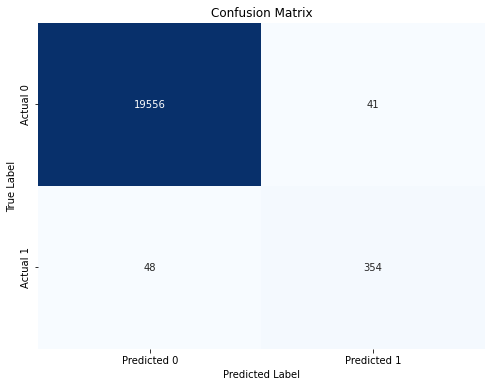

In [71]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
import xgboost as xgb

# XGBoost model initialization and training
model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate F1 score on the test set
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# Calculate ROC AUC on the test set
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"ROC AUC: {roc_auc:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Accuracy: 99.49%
F1 Score: 87.38%
ROC AUC: 99.88%


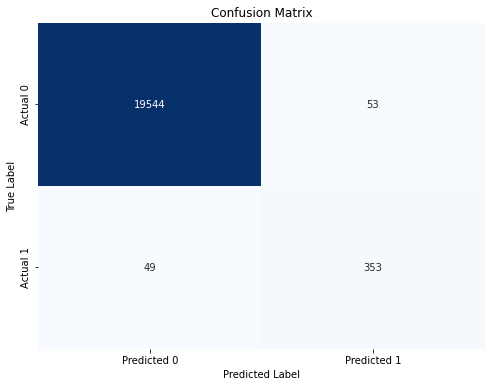

In [73]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import ADASYN
import xgboost as xgb

# Apply ADASYN to the training data
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# XGBoost model initialization and training
model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
model.fit(X_resampled, y_resampled)

# Predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate F1 score on the test set
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1 * 100:.2f}%")

# Calculate ROC AUC on the test set
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"ROC AUC: {roc_auc * 100:.2f}%")

# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Display confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


Accuracy: 99.54%
F1 Score: 88.81%
ROC AUC: 99.89%


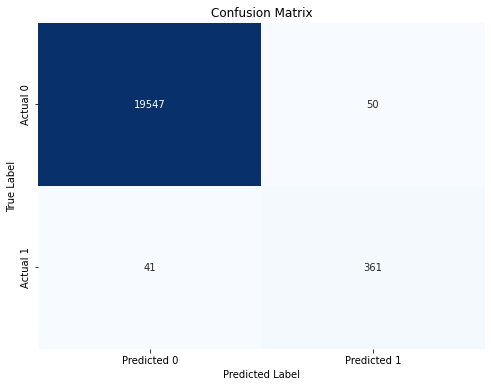

In [74]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# XGBoost model initialization and training
model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
model.fit(X_resampled, y_resampled)

# Predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate F1 score on the test set
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1 * 100:.2f}%")

# Calculate ROC AUC on the test set
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"ROC AUC: {roc_auc * 100:.2f}%")

# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Display confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [75]:
y_train_df = pd.DataFrame(y_resampled)
y_train_df[y_train_df["Target"]==1].count()

Target    78398
dtype: int64

In [76]:
X_test.shape

(19999, 150)

In [77]:
y_test_df = pd.DataFrame(y_test)
y_test_df[y_test_df["Target"]==1].count()

Target    402
dtype: int64

In [78]:
X_resampled.shape

(156796, 150)

In [79]:
y_resampled.shape

(156796,)

In [80]:
df_val = pd.read_csv("validation_data_to_be_shared.csv",low_memory=False)
df_val.head()

,Primary key,account_opening_date,country_code,demog_1,demog_2,income,demog_3,city_tier,occupation,demog_4,...,demog_39,email_domain,demog_40,demog_41,others_42,others_43,others_44,others_45,demog_42,demog_43
0,9000001,25-03-2023,IN,56.0,2,5L to 10L,101.0,Tier 7,Self_Employed,N,...,1,gmail,High,1,NaN,NaN,NaN,NaN,1,High
1,9000002,15-01-2023,IN,55.0,1,100001 to 5L,101.0,Tier 5,Salaried,N,...,1,gmail,low,1,NaN,NaN,NaN,NaN,1,medium
2,9000003,06-01-2023,IN,55.0,1,100001 to 5L,101.0,Tier 1,Other,N,...,1,gmail,low,1,NaN,NaN,NaN,NaN,1,medium
3,9000004,08-02-2023,IN,55.0,1,100001 to 5L,101.0,Tier 1,Other,N,...,1,gmail,medium,1,NaN,0.0,NaN,NaN,1,High
4,9000005,27-01-2023,IN,55.0,1,100001 to 5L,101.0,Tier 5,Other,N,...,1,gmail,low,1,NaN,NaN,NaN,NaN,1,High


In [81]:
df_val.describe()

,Primary key,demog_1,demog_3,demog_5,demog_6,demog_7,demog_8,demog_11,txn_1,txn_2,...,others_41,txn_80,txn_81,demog_39,demog_41,others_42,others_43,others_44,others_45,demog_42
count,5.000000e+04,48136.000000,49993.000000,49986.000000,49997.000000,49993.0,48085.000000,49997.000000,37132.000000,37132.000000,...,49996.00000,21135.000000,24190.000000,50000.000000,50000.000000,996.000000,2216.000000,466.000000,327.000000,50000.000000
mean,9.025000e+06,79.684457,101.321925,3.288521,1.016921,1.0,41.195279,0.002240,0.146908,0.324491,...,0.00246,36.089283,22.447168,0.999860,0.962660,103.547189,59.050993,41.959227,84.186544,0.958240
std,1.443390e+04,89.702611,5.328261,0.836486,0.183511,0.0,0.642936,0.047277,3.076580,4.227917,...,0.04954,265.426659,38.044688,0.011831,0.189595,308.676889,177.841070,234.463415,312.907607,0.200042
min,9.000001e+06,51.000000,101.000000,1.000000,1.000000,1.0,41.000000,0.000000,0.000000,0.000000,...,0.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.012501e+06,55.000000,101.000000,3.000000,1.000000,1.0,41.000000,0.000000,0.000000,0.000000,...,0.00000,2.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,9.025000e+06,55.000000,101.000000,4.000000,1.000000,1.0,41.000000,0.000000,0.000000,0.000000,...,0.00000,5.000000,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.037500e+06,55.000000,101.000000,4.000000,1.000000,1.0,41.000000,0.000000,0.000000,0.000000,...,0.00000,15.000000,26.000000,1.000000,1.000000,23.000000,11.000000,0.000000,0.000000,1.000000
max,9.050000e+06,424.000000,213.000000,4.000000,4.000000,1.0,52.000000,1.000000,384.000000,384.000000,...,1.00000,11152.000000,1298.000000,1.000000,1.000000,3077.000000,2557.000000,3105.000000,2911.000000,1.000000


In [82]:
primary_key = df_val["Primary key"]

In [83]:
columns_list = new_df.columns.tolist()
columns_list.remove("Target")
# Extract columns using pandas DataFrame indexing
new_df_val = df_val[columns_list]

In [84]:
new_df_val.head()

,country_code,income,city_tier,occupation,os,txn_1,txn_2,txn_3,txn_4,txn_5,...,others_33,others_34,others_35,others_36,others_37,others_38,others_39,others_40,others_41,email_domain
0,IN,5L to 10L,Tier 7,Self_Employed,and,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,gmail
1,IN,100001 to 5L,Tier 5,Salaried,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,gmail
2,IN,100001 to 5L,Tier 1,Other,and,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,gmail
3,IN,100001 to 5L,Tier 1,Other,and,2.0,5.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,gmail
4,IN,100001 to 5L,Tier 5,Other,and,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,gmail


In [85]:
df_val_cat=new_df_val.select_dtypes(include=['object'])
df_val_num=new_df_val.select_dtypes(include=['number'])

In [86]:
df_val_cat

,country_code,income,city_tier,occupation,os,email_domain
0,IN,5L to 10L,Tier 7,Self_Employed,and,gmail
1,IN,100001 to 5L,Tier 5,Salaried,NaN,gmail
2,IN,100001 to 5L,Tier 1,Other,and,gmail
3,IN,100001 to 5L,Tier 1,Other,and,gmail
4,IN,100001 to 5L,Tier 5,Other,and,gmail
...,...,...,...,...,...,...
49995,IN,100001 to 5L,Tier 6,Self_Employed,ios,Others
49996,IN,100001 to 5L,Tier 2,Self_Employed,and,gmail
49997,IN,5L to 10L,Rural,Self_Employed,and,gmail
49998,IN,100001 to 5L,Tier 5,Student,and,gmail


In [93]:
columns_to_check = ["country_code", "income", "city_tier", "occupation", "os", "email_domain"]
for column in columns_to_check:
    null_count = df_val_cat[column].isnull().sum()
    print(f"{column}: {null_count}")

country_code: 1863
income: 7
city_tier: 2133
occupation: 4
os: 12369
email_domain: 0


In [96]:
# Identify categorical columns
categorical_columns = df_val_cat.columns

# Impute missing values in categorical columns
imputer = SimpleImputer(strategy='most_frequent')  # You can also use 'constant' or 'constant' with the fill_value parameter
new_df_val[categorical_columns] = imputer.fit_transform(new_df_val[categorical_columns])


C:\Users\anand\AppData\Local\Temp\ipykernel_3024\4276888749.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_val[categorical_columns] = imputer.fit_transform(new_df_val[categorical_columns])


In [98]:
columns_to_check = ["country_code", "income", "city_tier", "occupation", "os", "email_domain"]
for column in columns_to_check:
    null_count = new_df_val[column].isnull().sum()
    print(f"{column}: {null_count}")

country_code: 0
income: 0
city_tier: 0
occupation: 0
os: 0
email_domain: 0


In [99]:
new_df_val.columns

Index(['country_code', 'income', 'city_tier', 'occupation', 'os', 'txn_1',
       'txn_2', 'txn_3', 'txn_4', 'txn_5',
       ...
       'others_33', 'others_34', 'others_35', 'others_36', 'others_37',
       'others_38', 'others_39', 'others_40', 'others_41', 'email_domain'],
      dtype='object', length=125)

In [100]:
label_encoder = LabelEncoder()

# Fit and transform the country codes column
encoded_country_column = label_encoder.fit_transform(new_df_val['country_code'])
new_df_val['country_code']=encoded_country_column
new_df_val['country_code'].value_counts()

C:\Users\anand\AppData\Local\Temp\ipykernel_3024\936478168.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_val['country_code']=encoded_country_column


9     49775
25       71
6        26
3        20
1        18
0        17
23       13
4        11
12       10
21        9
20        7
18        3
2         3
7         3
8         2
14        2
22        1
11        1
5         1
19        1
17        1
24        1
10        1
15        1
16        1
13        1
Name: country_code, dtype: int64

In [101]:
categorical_columns_to_encode_val = ['city_tier', 'os', 'email_domain','occupation']

df_val_encoded = one_hot_encode_columns(new_df_val, categorical_columns_to_encode_val)
df_val_encoded.head()


,country_code,income,txn_1,txn_2,txn_3,txn_4,txn_5,txn_6,txn_7,txn_8,...,email_domain_rediff,email_domain_yahoo,occupation_Homemaker,occupation_Minor,occupation_Other,occupation_Retired,occupation_Salaried,occupation_Self_Employed,occupation_Student,occupation_Unemployed
0,9,5L to 10L,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,...,0,0,0,0,0,0,0,1,0,0
1,9,100001 to 5L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
2,9,100001 to 5L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
3,9,100001 to 5L,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,9,100001 to 5L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0


In [102]:
# Apply label encoding based on counts for the 'Category' column
df_val_encoded = label_encode_based_on_counts(df_val_encoded, 'income')

In [103]:
df_val_encoded.head()

,country_code,income,txn_1,txn_2,txn_3,txn_4,txn_5,txn_6,txn_7,txn_8,...,email_domain_rediff,email_domain_yahoo,occupation_Homemaker,occupation_Minor,occupation_Other,occupation_Retired,occupation_Salaried,occupation_Self_Employed,occupation_Student,occupation_Unemployed
0,9,3,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,...,0,0,0,0,0,0,0,1,0,0
1,9,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
2,9,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
3,9,1,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,9,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0


In [104]:
df_val_final=fill_missing_values(df_val_encoded)
df_val_final.describe()

,country_code,income,txn_1,txn_2,txn_3,txn_4,txn_5,txn_6,txn_7,txn_8,...,email_domain_rediff,email_domain_yahoo,occupation_Homemaker,occupation_Minor,occupation_Other,occupation_Retired,occupation_Salaried,occupation_Self_Employed,occupation_Student,occupation_Unemployed
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,9.021060,1.878160,0.146908,0.324491,0.164871,0.413767,2.752478,6.604115,0.932996,2.265593,...,0.002120,0.011900,0.056360,0.004240,0.251580,0.011200,0.271980,0.298720,0.105380,0.000540
std,0.746021,1.190875,2.651281,3.643461,2.364099,3.130274,49.241462,125.399242,26.885424,31.620014,...,0.045995,0.108437,0.230618,0.064978,0.433925,0.105237,0.444984,0.457701,0.307046,0.023232
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.000000,2.000000,0.146908,0.324491,0.164871,0.413767,2.752478,6.604115,0.932996,2.265593,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,25.000000,9.000000,384.000000,384.000000,349.000000,349.000000,5018.000000,12355.000000,5780.000000,5799.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [105]:
df_val_final[df_val_final.isna().any(axis=1)]

,country_code,income,txn_1,txn_2,txn_3,txn_4,txn_5,txn_6,txn_7,txn_8,...,email_domain_rediff,email_domain_yahoo,occupation_Homemaker,occupation_Minor,occupation_Other,occupation_Retired,occupation_Salaried,occupation_Self_Employed,occupation_Student,occupation_Unemployed


In [106]:
df_val_final.shape

(50000, 150)

In [107]:
# Predictions on the test set
y_val_pred = model.predict(df_val_final)

In [108]:
y_val_pred

array([0, 0, 0, ..., 0, 1, 1])

In [109]:
y_val_pred_df = pd.DataFrame(y_val_pred,columns = ["Target"])
y_val_pred_df[y_val_pred_df["Target"]==1].count()

Target    1149
dtype: int64

In [110]:
# Predict probabilities on the validation set
y_valid_proba = model.predict_proba(df_val_final)[:, 1]

In [111]:
y_valid_proba.shape

(50000,)

In [112]:
# Create a new column by appending the values from Column1 and Column2
y_val_pred_df['Probabilities'] = y_valid_proba

In [113]:
# Create a new column by appending the values from Column1 and Column2
y_val_pred_df['Primary key'] = primary_key

In [114]:
y_val_pred_df.head()

,Target,Probabilities,Primary key
0,0,1.828696e-06,9000001
1,0,2.473163e-06,9000002
2,0,3.547678e-07,9000003
3,0,3.939980e-07,9000004
4,0,9.494333e-06,9000005


In [115]:
y_val_pred_df=y_val_pred_df[['Primary key','Probabilities','Target']]

In [116]:
y_val_pred_df

,Primary key,Probabilities,Target
0,9000001,1.828696e-06,0
1,9000002,2.473163e-06,0
2,9000003,3.547678e-07,0
3,9000004,3.939980e-07,0
4,9000005,9.494333e-06,0
...,...,...,...
49995,9049996,9.481089e-01,1
49996,9049997,9.457029e-01,1
49997,9049998,2.550280e-01,0
49998,9049999,9.982760e-01,1


In [117]:
y_val_pred_df[y_val_pred_df["Target"]==1]["Probabilities"].describe()

count    1149.000000
mean        0.937566
std         0.116519
min         0.502287
25%         0.943578
50%         0.995288
75%         0.999385
max         0.999995
Name: Probabilities, dtype: float64